In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import numpy.random as rnd
from matplotlib.patches import Ellipse

In [2]:
# setup security 
access_token = '1013920258065948672-KvcLKXKaxF5Te5KAOqx9V9nQtwNti7'
access_token_secret = 'NcPQhOShTBn66bgaH7dwVocwqQaMEO6IziqjMQzkSHAfL'
consumer_key = '4XQCPpNBOgCwSl5cYrdRg3BbC'
consumer_secret = 'xNi5rOpayDOuJPvR2jkPehJ090uU0h7Ni4npZfhv3e1jT3iElY'

# setup file store
file = 'D:/Pos-Graduacao2017/RIWRS/tweets_usar.json'

In [3]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()

In [ ]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 10 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['Jair Bolsonaro', 'Marina Silva', 'Rodrigo Maia',
                             'Geraldo Alckmin', 'Ciro Gomes', 'jair bolsonaro', 'bolsonaro',
                             'marina silva', 'rodrigo maia', 'geraldo alckmin', 'ciro gomes'],async=True,languages=['pt'])

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

In [4]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [5]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(1))

  lang                                               text country
0   pt  vergonha daquele outdoor do Bolsonaro no centr...    None


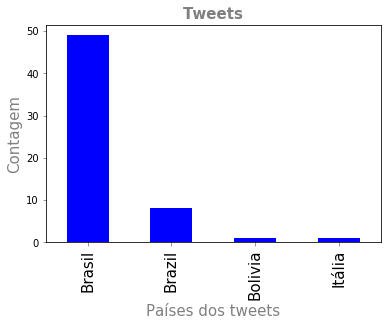

In [13]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15, color='grey')
ax.tick_params(axis='y', labelsize=10, color='grey')
ax.set_xlabel('Países dos tweets', fontsize=15, color='grey')
ax.set_ylabel('Contagem' , fontsize=15, color='grey')
ax.set_title('Tweets', fontsize=15, fontweight='bold', color='grey')
tweets_by_country[:10].plot(ax=ax, kind='bar', color='blue')

In [7]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [8]:
candidatos = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('Jair Bolsonaro', tweet['text']):
            candidatos.append('Jair Bolsonaro')
        elif word_in_text('Bolsonaro', tweet['text']):
            candidatos.append('Jair Bolsonaro')
        elif word_in_text('Marina Silva', tweet['text']):
            candidatos.append('Marina Silva')
        elif word_in_text('Rodrigo Maia', tweet['text']):
            candidatos.append('Rodrigo Maia')
        elif word_in_text('Geraldo Alckmin', tweet['text']):
            candidatos.append('Geraldo Alckmin')
        elif word_in_text('Alckmin', tweet['text']):
            candidatos.append('Geraldo Alckmin')            
        elif word_in_text('Ciro Gomes', tweet['text']):
            candidatos.append('Ciro Gomes')
        else:
            candidatos.append('(ruído)')
            continue
tweets['candidatos'] = candidatos
tweets.head(5)

,lang,text,country,candidatos
0,pt,vergonha daquele outdoor do Bolsonaro no centr...,None,Jair Bolsonaro
1,pt,"RT @fabiocoutsilva: PMs gritavam ""Bolsonaro pr...",None,Jair Bolsonaro
2,pt,RT @GenPauloChagas: Na confusão do caos sobres...,None,Jair Bolsonaro
3,pt,RT @cinefilo_K: RT para quando alguém disser q...,None,Jair Bolsonaro
4,pt,RT @OsvladPereira: Onix Lorenzoni anuncia\nApo...,None,Jair Bolsonaro


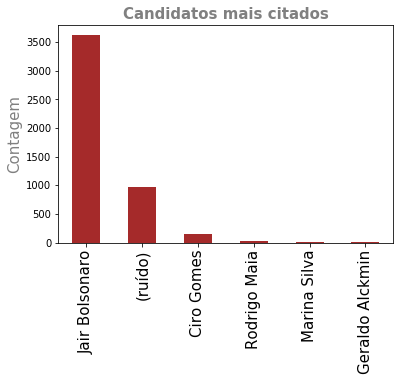

In [17]:
candidatos = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('Jair Bolsonaro', tweet['text']):
            candidatos.append('Jair Bolsonaro')
        elif word_in_text('Bolsonaro', tweet['text']):
            candidatos.append('Jair Bolsonaro')
        elif word_in_text('Marina Silva', tweet['text']):
            candidatos.append('Marina Silva')
        elif word_in_text('Rodrigo Maia', tweet['text']):
            candidatos.append('Rodrigo Maia')
        elif word_in_text('Geraldo Alckmin', tweet['text']):
            candidatos.append('Geraldo Alckmin')
        elif word_in_text('Alckmin', tweet['text']):
            candidatos.append('Geraldo Alckmin')            
        elif word_in_text('Ciro Gomes', tweet['text']):
            candidatos.append('Ciro Gomes')
        else:
            candidatos.append('(ruído)')
tweets['candidatos'] = candidatos
#tweets.head(2)
tweets_por_candidato = tweets['candidatos'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
#ax.set_xlabel('Candidatos', fontsize=15, color='grey')
ax.set_ylabel('Contagem' , fontsize=15, color='grey')
ax.set_title('Candidatos mais citados', fontsize=15, fontweight='bold', color='grey')
tweets_por_candidato[:10].plot(ax=ax, kind='bar', color='brown')


In [152]:
dicionario = set()
candidatos = []

for tweet in tweets_data:    
    if word_in_text('Bolsonaro', tweet['text']):
        textoPuro = tweet['text']
        #print(textoPuro)
        textoQuebrado = textoPuro.lower().split(' ')
        #print(textoQuebrado)
        for lista in textoQuebrado:
            dicionario.update(lista)
print(dicionario)
            
total = len(dicionario)
tuplas = zip(dicionario, range(total))
tradutor = {palavra: indice for palavra, indice in tuplas}

def vetorizar_texto(texto, tradutor):
    vetor = [0] * len(tradutor)
    for palavra in texto:
        if palavra in tradutor:
            posicao = tradutor[palavra]
            vetor[posicao] += 1

    return vetor

vetoresDeTexto = [vetorizar_texto(texto, tradutor) for texto in textoQuebrado]
#print(vetoresDeTexto[1])
#print(textoQuebrado[1])


{'?', 'c', '“', '_', 'ø', 'ʀ', '1', '0', 'a', '🇧', 'ó', '|', '4', '👇', ':', '7', '…', '°', 'v', '[', ',', '‘', 'l', '"', 'h', '😎', '—', '–', 'r', 'º', 'í', 'p', 'ñ', 'e', 't', 'x', '+', '/', 'k', 'é', 'i', '~', '@', '♪', '📌', 'u', 's', '#', "'", 'w', '💎', 'β', '%', ']', '”', 'α', 'n', 'o', '🤣', '📍', ';', '&', 'm', 'ú', '😪', 'g', 'ê', '🔰', '-', '(', ')', '•', '👑', 'õ', '!', '2', 'ç', 'd', '\xa0', 'q', 'ã', '🇷', '👏', '6', 'à', '=', 'á', '3', 'j', '.', '*', 'ô', 'â', '🙂', '’', 'y', 'ε', '̂', '5', '8', 'b', '\n', 'f', '😂', 'z', '9'}


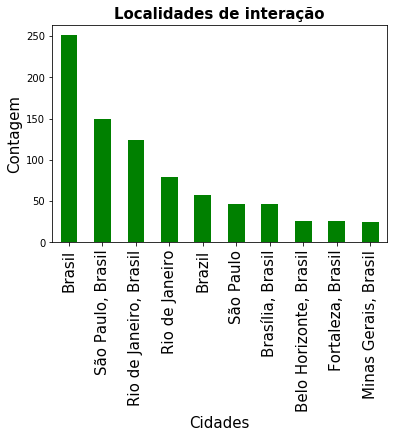

In [14]:
lista = []
for tweet in tweets_data:
    lista.append(tweet['user']['location'])
    
    
tweets['localidades'] = lista
#tweets.head(2)
tweets_por_localidades = tweets['localidades'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Cidades', fontsize=15)
ax.set_ylabel('Contagem' , fontsize=15)
ax.set_title('Localidades de interação', fontsize=15, fontweight='bold')
tweets_por_localidades[:10].plot(ax=ax, kind='bar', color='green')    